<a href="https://colab.research.google.com/github/Khiet-ht/AI/blob/main/W6_11_03_FuzzyControl(trenlop).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 30.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=99979cdae20c4cbf12d0803e4042c074a402e725fe5581c2f8861ef03418f44f
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


205.59523809523813


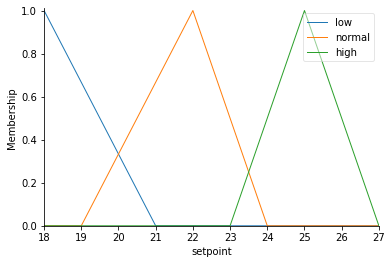

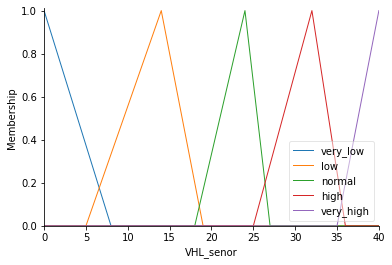

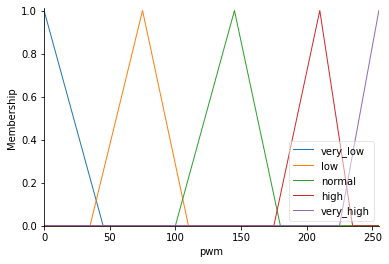

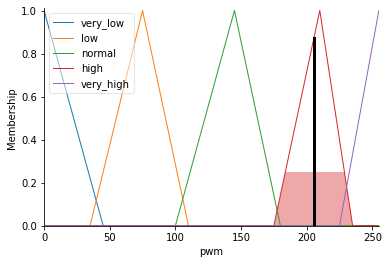

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


#Ancetedent
setpoint = ctrl.Antecedent(np.arange(18,27.1,1),'setpoint')
VHL_senor = ctrl.Antecedent(np.arange(0,40.1,1),'VHL_senor')
pwm= ctrl.Consequent(np.arange(0,255.1,1),'pwm')

#
setpoint['low'] = fuzz.trimf(setpoint.universe,[18,18,21])
setpoint['normal']= fuzz.trimf(setpoint.universe,[19,22,24])
setpoint['high'] = fuzz.trimf(setpoint.universe,[23,25,27])
setpoint.view()

VHL_senor['very_low'] = fuzz.trimf(VHL_senor.universe,[0,0,8])
VHL_senor['low'] = fuzz.trimf(VHL_senor.universe,[5,14,19])
VHL_senor['normal'] = fuzz.trimf(VHL_senor.universe,[18,24,27])
VHL_senor['high'] = fuzz.trimf(VHL_senor.universe,[25,32,36])
VHL_senor['very_high'] = fuzz.trimf(VHL_senor.universe,[35,40,40])
VHL_senor.view()

pwm['very_low'] = fuzz.trimf(pwm.universe,[0,0,45])
pwm['low'] = fuzz.trimf(pwm.universe,[35,75,110])
pwm['normal'] = fuzz.trimf(pwm.universe,[100,145,180])
pwm['high'] = fuzz.trimf(pwm.universe,[175,210,235])
pwm['very_high'] = fuzz.trimf(pwm.universe,[225,255,255])
pwm.view()


#rule
rule1 = ctrl.Rule(setpoint['low']&VHL_senor['very_low'],pwm['very_low'])
rule2 = ctrl.Rule(setpoint['low']&VHL_senor['low'],pwm['very_low'])
rule3 = ctrl.Rule(setpoint['low']&VHL_senor['normal'],pwm['normal'])
rule4 = ctrl.Rule(setpoint['low']&VHL_senor['high'],pwm['normal'])
rule5 = ctrl.Rule(setpoint['low']&VHL_senor['very_high'],pwm['high'])
rule6 = ctrl.Rule(setpoint['normal']&VHL_senor['very_low'],pwm['low'])
rule7 = ctrl.Rule(setpoint['normal']&VHL_senor['low'],pwm['very_low'])
rule8 = ctrl.Rule(setpoint['normal']&VHL_senor['normal'],pwm['normal'])
rule9 = ctrl.Rule(setpoint['normal']&VHL_senor['high'],pwm['high'])
rule10 = ctrl.Rule(setpoint['normal']&VHL_senor['very_high'],pwm['high'])
rule11 = ctrl.Rule(setpoint['high']&VHL_senor['very_low'],pwm['low'])
rule12 = ctrl.Rule(setpoint['high']&VHL_senor['low'],pwm['normal'])
rule13 = ctrl.Rule(setpoint['high']&VHL_senor['normal'],pwm['high'])
rule14 = ctrl.Rule(setpoint['high']&VHL_senor['high'],pwm['very_high'])
rule15 = ctrl.Rule(setpoint['high']&VHL_senor['very_high'],pwm['very_high'])


pwm_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])

pwming=ctrl.ControlSystemSimulation(pwm_ctrl)
pwming.input['setpoint']=21
pwming.input['VHL_senor']=35
pwming.compute()
print(pwming.output['pwm'])
pwm.view(sim=pwming)



